

## DS_D34_LU1_V1.0   

In this demo, you will be building a Simple Linear Regression Model  

---

## Problem Statement:

Given the dataset set of advertising Predict sales based on TV ads

<div style="background-color:##EDF9FF">
 <ul><li><h3>Import required libraries</h3></li></ul>
</div>

In [64]:
pip install statspy

In [65]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Dataset

The dataset contains various adversting medias and their respective sales 

- <b>TV:</b> Adversting in TV
- <b>radio:</b> Advertising in radio
- <b>newspaper:</b> Advertising in newspaper

<div style="background-color:##EDF9FF">
 <ul><li><h3>Read the data from the csv file</h3></li></ul>
</div>

In [67]:
data = pd.read_csv('TATAMOTORS.NS.csv') #reading data
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-12-25,72.819626,72.819626,72.819626,72.819626,53.472775,0.0
1,1995-12-26,72.819626,72.819626,72.819626,72.819626,53.472775,0.0
2,1995-12-27,72.819626,72.819626,72.819626,72.819626,53.472775,0.0
3,1995-12-28,72.819626,72.819626,72.819626,72.819626,53.472775,0.0
4,1995-12-29,72.819626,72.819626,72.819626,72.819626,53.472775,0.0


## Open & Close

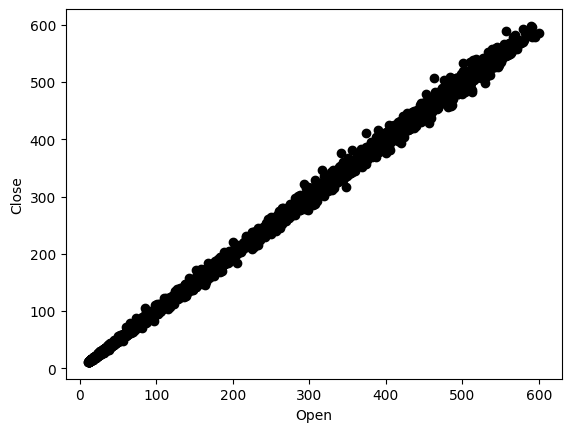

In [68]:
plt.figure()
plt.scatter(data['Open'],data['Close'],c='black')
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

In [69]:
data.isna().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [70]:
df=data.fillna(data.mean())

C:\Users\sabar\AppData\Local\Temp\ipykernel_39056\151685739.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=data.fillna(data.mean())


In [71]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<div style="background-color:##EDF9FF">
 <ul><li><h3>Reshape and fit the data into simple linear regression</h3></li></ul>
</div>

In [72]:
X = df['Open'].values.reshape(-1,1)
y = df['Close'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

<div style="background-color:##EDF9FF">
 <ul><li><h3>R-squared value</h3></li></ul>
</div>

In [73]:
reg.score(X,y)

0.9990333514489149

<div style="background-color:##EDF9FF">
 <ul><li><h3>Print co-efficient and intercept</h3></li></ul>
</div>

In [74]:
print(reg.coef_)
print(reg.intercept_)

[[0.99788142]]
[0.09688807]


<div style="background-color:##EDF9FF">
 <ul><li><h3>Plot actual vs predicted values</h3></li></ul>
</div>

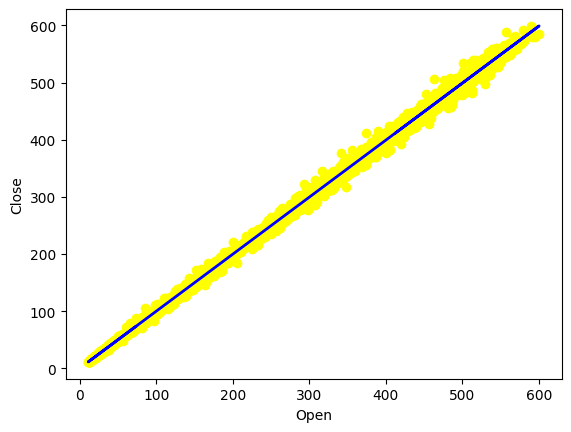

In [75]:
y_pred = reg.predict(X)
plt.figure()
plt.scatter(df['Open'],df['Close'],c='yellow')
plt.plot(df['Open'],y_pred,c='blue',linewidth=2)
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

In [76]:
pc=pd.DataFrame(y_pred,columns=['Predicted Close'])
pc.head()

,Predicted Close
0,72.76224
1,72.76224
2,72.76224
3,72.76224
4,72.76224


## Open & high

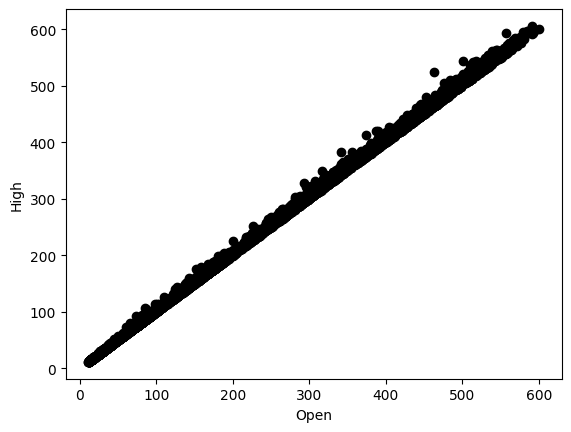

In [77]:
plt.figure()
plt.scatter(data['Open'],data['High'],c='black')
plt.xlabel("Open")
plt.ylabel("High")
plt.show()

In [78]:
X_high= df['Open'].values.reshape(-1,1)
y_high= df['High'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X_high,y_high)

LinearRegression()

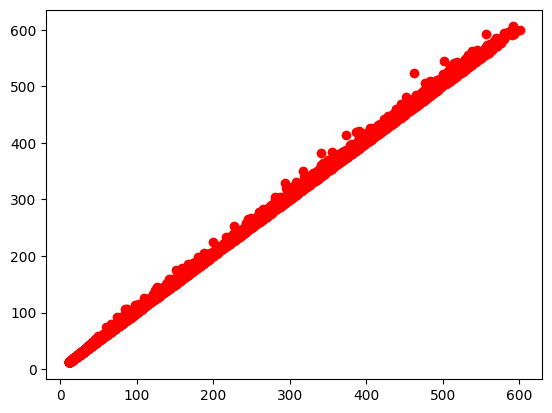

In [79]:
plt.scatter(df['Open'],df['High'],c='red')

In [80]:
reg.score(X_high,y_high)

0.9995303738617275

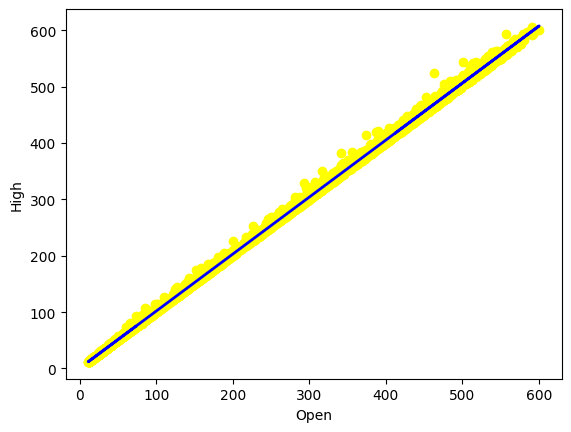

In [81]:
y_pred_high = reg.predict(X_high)
plt.figure()
plt.scatter(df['Open'],df['High'],c='yellow')
plt.plot(df['Open'],y_pred_high,c='blue',linewidth=2)
plt.xlabel("Open")
plt.ylabel("High")
plt.show()

In [82]:
ph=pd.DataFrame(y_pred_high,columns=['Predicted High'])
ph.head()

,Predicted High
0,74.352415
1,74.352415
2,74.352415
3,74.352415
4,74.352415


## Open & Close

In [83]:
X_low = df['Open'].values.reshape(-1,1)
y_low = df['Low'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X_low, y_low)

LinearRegression()

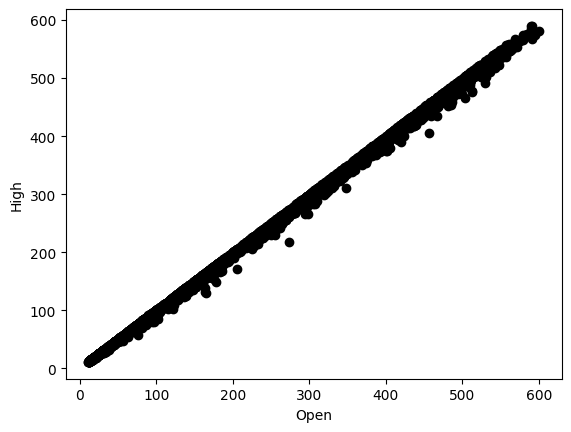

In [84]:
plt.figure()
plt.scatter(data['Open'],data['Low'],c='black')
plt.xlabel("Open")
plt.ylabel("High")
plt.show()

In [85]:
reg.score(X_low,y_low)

0.9994643176852619

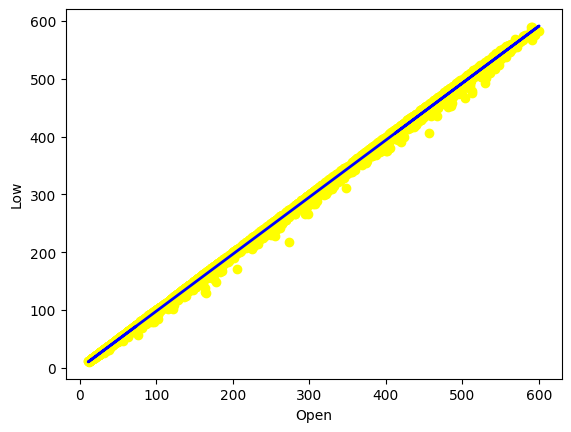

In [86]:
y_pred_low = reg.predict(X_low)
plt.figure()
plt.scatter(df['Open'],df['Low'],c='yellow')
plt.plot(df['Open'],y_pred_low,c='blue',linewidth=2)
plt.xlabel("Open")
plt.ylabel("Low")
plt.show()

In [87]:
pl=pd.DataFrame(y_pred_low,columns=['Predicted Low'])
pl.head()

,Predicted Low
0,71.211456
1,71.211456
2,71.211456
3,71.211456
4,71.211456


In [90]:
op=pd.DataFrame(df['Open'])
op.head()

,Open
0,72.819626
1,72.819626
2,72.819626
3,72.819626
4,72.819626


In [96]:
f=pd.concat([op,ph,pl,pc],axis=1)
final=f.groupby('Open').first()
final

,Predicted High,Predicted Low,Predicted Close
Open,,,
11.114574,11.926822,10.380911,11.187915
11.258297,12.072224,10.522597,11.331333
11.593651,12.411494,10.853199,11.665977
11.631977,12.450267,10.890981,11.704222
11.689466,12.508428,10.947656,11.761589
...,...,...,...
591.060303,598.644679,582.107429,589.904981
591.307617,598.894881,582.351238,590.151771
592.643311,600.246172,583.668002,591.484635


In [97]:
final.to_csv('TATA Prediction File.csv')